In [1]:
import os
import pandas as pd

# Get the current working directory
current_dir = os.getcwd()

# Define the relative path to your CSV file
csv_filename = 'df_eucsv'

# Construct the full path based on the operating system
csv_path = os.path.join(current_dir, csv_filename)

# Read the CSV file
dfEU = pd.read_csv(csv_path)





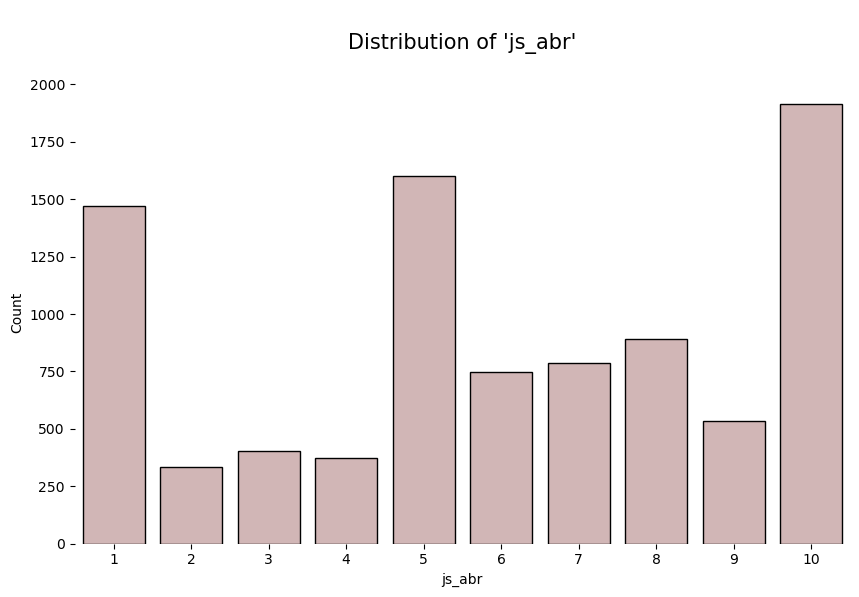

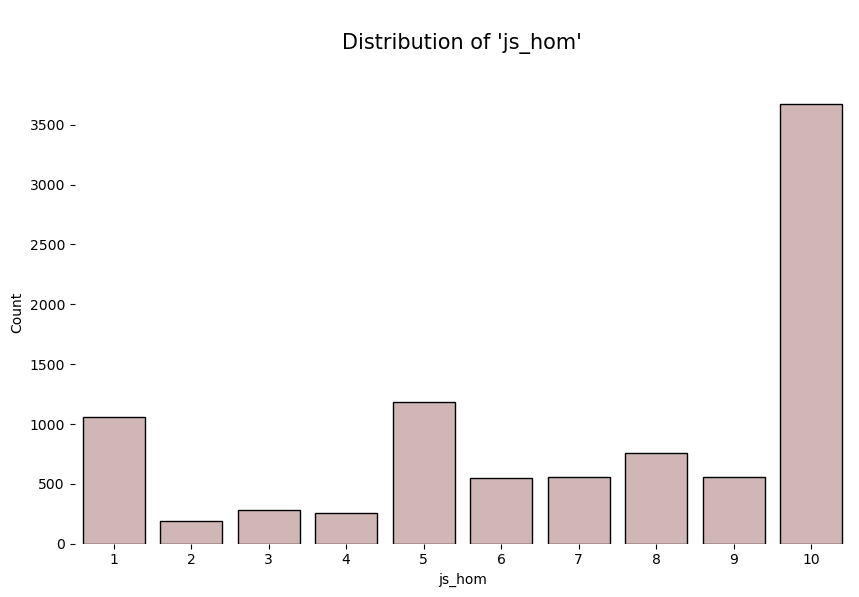

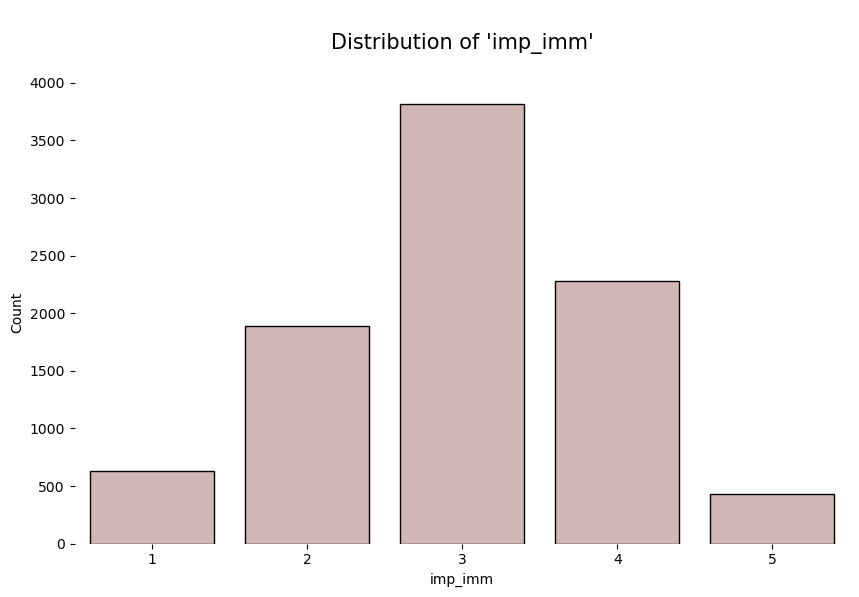

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for variable 'js_abr'
plt.subplots(figsize=(10, 6))
p = sns.countplot(data=dfEU, x="js_abr", color="#D6B2B1", edgecolor="black")
p.axes.set_title("\nDistribution of 'js_abr'\n", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xlabel("js_abr", fontsize=10)
sns.despine(left=True, bottom=True)

plt.show()

# Plot for variable 'js_hom'
plt.subplots(figsize=(10, 6))
p = sns.countplot(data=dfEU, x="js_hom", color="#D6B2B1", edgecolor="black")
p.axes.set_title("\nDistribution of 'js_hom'\n", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xlabel("js_hom", fontsize=10)
sns.despine(left=True, bottom=True)

plt.show()

# Plot for variable 'imp_imm'
plt.subplots(figsize=(10, 6))
p = sns.countplot(data=dfEU, x="imp_imm", color="#D6B2B1", edgecolor="black")
p.axes.set_title("\nDistribution of 'imp_imm'\n", fontsize=15)
plt.ylabel("Count", fontsize=10)
plt.xlabel("imp_imm", fontsize=10)
sns.despine(left=True, bottom=True)

plt.show()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

fig_abr = px.bar(dfEU['js_abr'].value_counts().reset_index(), 
                 x='index', y='js_abr',
                 title="Distribution of 'js_abr'",
                 labels={'index': 'js_abr', 'js_abr': 'Count'},
                 color_discrete_sequence=['#D6B2B1'])
fig_abr.update_layout(
    title_font_size=20, 
    xaxis_title_font_size=15, 
    yaxis_title_font_size=15,
    plot_bgcolor='rgba(0,0,0,0)'
)
fig_abr.show()

# Bar plot for 'js_hom'
fig_hom = px.bar(dfEU['js_hom'].value_counts().reset_index(), 
                 x='index', y='js_hom',
                 title="Distribution of 'js_hom'",
                 labels={'index': 'js_hom', 'js_hom': 'Count'},
                 color_discrete_sequence=['#B1D6D4'])
fig_hom.update_layout(
    title_font_size=20, 
    xaxis_title_font_size=15, 
    yaxis_title_font_size=15,
    plot_bgcolor='rgba(0,0,0,0)'
)
fig_hom.show()

# Bar plot for 'imp_imm'
fig_imm = px.bar(dfEU['imp_imm'].value_counts().reset_index(), 
                 x='index', y='imp_imm',
                 title="Distribution of 'imp_imm'",
                 labels={'index': 'imp_imm', 'imp_imm': 'Count'},
                 color_discrete_sequence=['#FAD7B2'])
fig_imm.update_layout(
    title_font_size=20, 
    xaxis_title_font_size=15, 
    yaxis_title_font_size=15,
    plot_bgcolor='rgba(0,0,0,0)'
)
fig_imm.show()

# if target is needed uncomment the following line

In [57]:
# dfEU['target'] = dfEU['js_abr'] + dfEU['js_hom'] + dfEU['imp_imm']

# # Apply the condition to label as 0 or 1
# dfEU['target'] = dfEU['target'].apply(lambda x: 1 if x >= 12 else 0)
# dfEU.drop(['js_abr', 'imp_imm', 'js_hom'], axis=1, inplace=True)




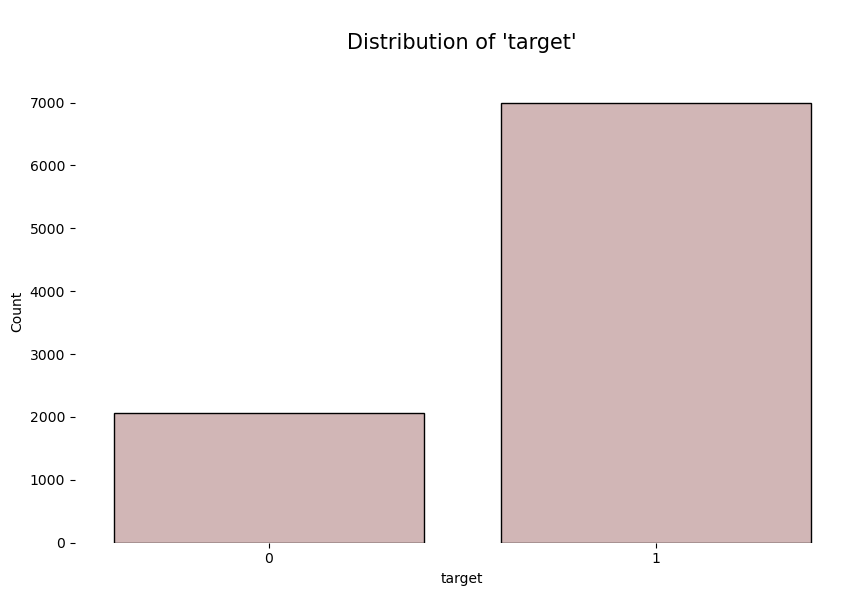

In [50]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plot for variable 'js_abr'
# plt.subplots(figsize=(10, 6))
# p = sns.countplot(data=dfEU, x="target", color="#D6B2B1", edgecolor="black")
# p.axes.set_title("\nDistribution of 'target'\n", fontsize=15)
# plt.ylabel("Count", fontsize=10)
# plt.xlabel("target", fontsize=10)
# sns.despine(left=True, bottom=True)

# plt.show()



In [58]:
# # Bar plot for 'imp_imm'
# fig_imm = px.bar(dfEU['target'].value_counts().reset_index(), 
#                  x='index', y='target',
#                  title="Distribution of 'target'",
#                  labels={'index': 'target', 'target': 'Count'},
#                  color_discrete_sequence=['#FAD7B2'])
# fig_imm.update_layout(
#     title_font_size=20, 
#     xaxis_title_font_size=15, 
#     yaxis_title_font_size=15,
#     plot_bgcolor='rgba(0,0,0,0)'
# )
# fig_imm.show()

# reduce

In [11]:
feature_names = [
    "js_div", "hom_prn", "js_euth", "js_sex", "js_prst", 
    "js_suic", "job_ntn", "job_men", "incm_lvl", "imp_rlg", 
    "c_chr", "men_uni", "dmc_obey", "edu_lvl", "rel", 
    "dmc_rlg", "cq_rlg", "men_lead", "men_bsn", "dmc_rght"
]

reduced_dfEU = dfEU[feature_names]


# FACTOR ANALYSIS

In [12]:
# scale dfeu

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()
# Scale dfEU
scaler.fit(reduced_dfEU)
scaled_reduced_dfEU = pd.DataFrame(scaler.transform(reduced_dfEU), columns=reduced_dfEU.columns)

In [13]:
# Calculate the covariance matrix of scaled_ds
cov_matrix = np.cov(scaled_reduced_dfEU.T)

# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Print the eigenvalues
print("Eigenvalues:")
for i, eigenvalue in enumerate(sorted_eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue}")

Eigenvalues:
Eigenvalue 1: 5.022492857007661
Eigenvalue 2: 2.1480442928095638
Eigenvalue 3: 1.5313105631833615
Eigenvalue 4: 1.3491881535238632
Eigenvalue 5: 1.0474568578550414
Eigenvalue 6: 1.0149517711492801
Eigenvalue 7: 0.8905695835081641
Eigenvalue 8: 0.8278967503891559
Eigenvalue 9: 0.7174047544374447
Eigenvalue 10: 0.652578614136097
Eigenvalue 11: 0.6453855810243921
Eigenvalue 12: 0.5978071271635205
Eigenvalue 13: 0.5764043077335745
Eigenvalue 14: 0.521883352720768
Eigenvalue 15: 0.505129853405381
Eigenvalue 16: 0.4635564177235297
Eigenvalue 17: 0.43512586496075417
Eigenvalue 18: 0.4214012692154145
Eigenvalue 19: 0.3339360700892329
Eigenvalue 20: 0.2996851703795817


In [14]:
from factor_analyzer import FactorAnalyzer
# Create an instance of FactorAnalyzer with 2 factors
efa = FactorAnalyzer(n_factors=3, rotation=None)

# Fit the EFA model to the data
efa.fit(scaled_reduced_dfEU)

# Get the factor loadings
factor_loadings = efa.loadings_

# Add the variable name
factor_loadings_df = pd.DataFrame(factor_loadings, index=scaled_reduced_dfEU.columns, columns=["Factor 1", "Factor 2", "Factor 3"])
print("Factor Loadings with Variable Names:")
print(factor_loadings_df)

Factor Loadings with Variable Names:
          Factor 1  Factor 2  Factor 3
js_div    0.613622 -0.113123  0.218760
hom_prn  -0.510382 -0.064383 -0.036863
js_euth   0.569663 -0.223713  0.147294
js_sex    0.539955 -0.177234  0.210569
js_prst   0.405456 -0.227170  0.263285
js_suic   0.486906 -0.173293  0.236834
job_ntn   0.356132  0.195535  0.188010
job_men   0.554661  0.311306  0.013873
incm_lvl  0.247241  0.061879  0.223578
imp_rlg   0.619058 -0.426525 -0.385463
c_chr     0.524445 -0.333436 -0.339657
men_uni   0.509432  0.489765 -0.118754
dmc_obey -0.249093  0.018887 -0.107113
edu_lvl   0.359454  0.067968  0.254244
rel       0.531249 -0.324258 -0.297881
dmc_rlg  -0.383521  0.032224 -0.088983
cq_rlg   -0.405565  0.203472  0.130435
men_lead  0.538276  0.555377 -0.166642
men_bsn   0.515337  0.604796 -0.213588
dmc_rght  0.173589  0.027536  0.191960


In [15]:
# Create an instance of FactorAnalyzer with 3 factors and oblimin rotation
efa_oblimin = FactorAnalyzer(n_factors=3, rotation="oblimin")

# Fit the EFA model with oblimin rotation to the data
efa_oblimin.fit(scaled_reduced_dfEU)

# Get the factor loadings with oblimin rotation
factor_loadings_oblimin = efa_oblimin.loadings_

# Create a DataFrame with the variable names and factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings_oblimin, index=scaled_reduced_dfEU.columns, columns=["Factor 1", "Factor 2", "Factor 3"])

# Print the DataFrame with factor loadings
print("Factor Loadings with Oblimin Rotation:")
print(factor_loadings_df)


Factor Loadings with Oblimin Rotation:
          Factor 1  Factor 2  Factor 3
js_div    0.590482  0.068461  0.077993
hom_prn  -0.302670 -0.254175 -0.107485
js_euth   0.513686 -0.025216  0.195812
js_sex    0.555320 -0.017433  0.097848
js_prst   0.549205 -0.137006  0.030204
js_suic   0.553756 -0.044895  0.051917
job_ntn   0.352680  0.257205 -0.167994
job_men   0.249935  0.506776 -0.002236
incm_lvl  0.359845  0.077514 -0.160502
imp_rlg   0.014370  0.000058  0.837270
c_chr    -0.007723  0.030317  0.705062
men_uni   0.046018  0.699388  0.000691
dmc_obey -0.253539 -0.046002  0.001738
edu_lvl   0.452192  0.117918 -0.153372
rel       0.038646  0.026531  0.662548
dmc_rlg  -0.309931 -0.095165 -0.070913
cq_rlg   -0.123755 -0.025882 -0.387961
men_lead -0.003350  0.788458  0.017038
men_bsn  -0.076383  0.841206  0.023813
dmc_rght  0.293377  0.027304 -0.136251


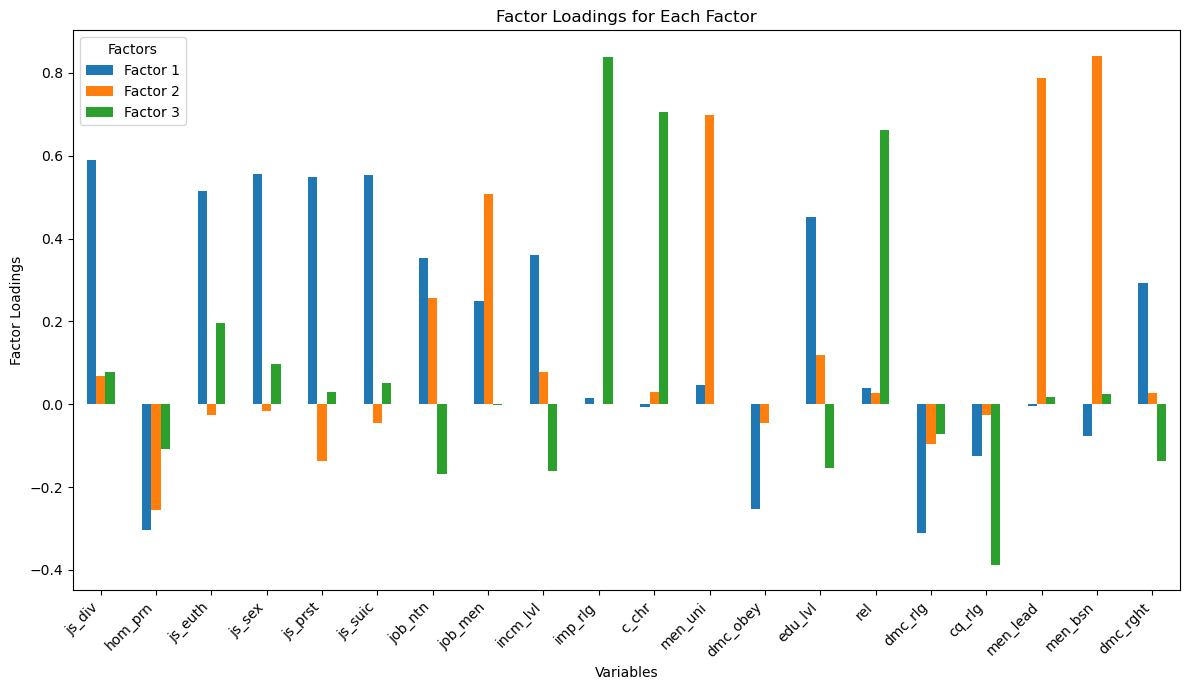

In [16]:
import matplotlib.pyplot as plt

factor_loadings_df.plot(kind='bar', figsize=(12, 7))
plt.xlabel('Variables')
plt.ylabel('Factor Loadings')
plt.title('Factor Loadings for Each Factor')
plt.legend(title='Factors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [17]:
# Create an instance of FactorAnalyzer with 2 factors and oblimin rotation
efa_oblimin = FactorAnalyzer(n_factors=3, rotation="varimax")

# Fit the EFA model with oblimin rotation to the data
efa_oblimin.fit(scaled_reduced_dfEU)

# Get the factor loadings with oblimin rotation
factor_loadings_oblimin = efa_oblimin.loadings_

# Create a DataFrame with the variable names and factor loadings
factor_loadings_df = pd.DataFrame(factor_loadings_oblimin, index=scaled_reduced_dfEU.columns, columns=["Factor 1", "Factor 2", "Factor 3"])

# Print the DataFrame with factor loadings
print("Factor Loadings with varimax Rotation:")
print(factor_loadings_df)


Factor Loadings with varimax Rotation:
          Factor 1  Factor 2  Factor 3
js_div    0.312861  0.165551  0.558476
hom_prn  -0.250321 -0.305949 -0.331253
js_euth   0.389373  0.072689  0.489249
js_sex    0.309678  0.077713  0.515134
js_prst   0.227832 -0.046742  0.480862
js_suic   0.260834  0.046300  0.503011
job_ntn  -0.001762  0.291225  0.339995
job_men   0.148588  0.535411  0.309854
incm_lvl -0.010752  0.116794  0.318100
imp_rlg   0.831560  0.079539  0.126170
c_chr     0.695805  0.093602  0.093183
men_uni   0.093057  0.693082  0.156430
dmc_obey -0.101354 -0.084119 -0.237757
edu_lvl   0.036343  0.171343  0.409619
rel       0.671414  0.093129  0.128969
dmc_rlg  -0.200101 -0.147750 -0.306879
cq_rlg   -0.433409 -0.080301 -0.169133
men_lead  0.099565  0.774318  0.128347
men_bsn   0.083595  0.815394  0.071513
dmc_rght -0.017916  0.059522  0.252737


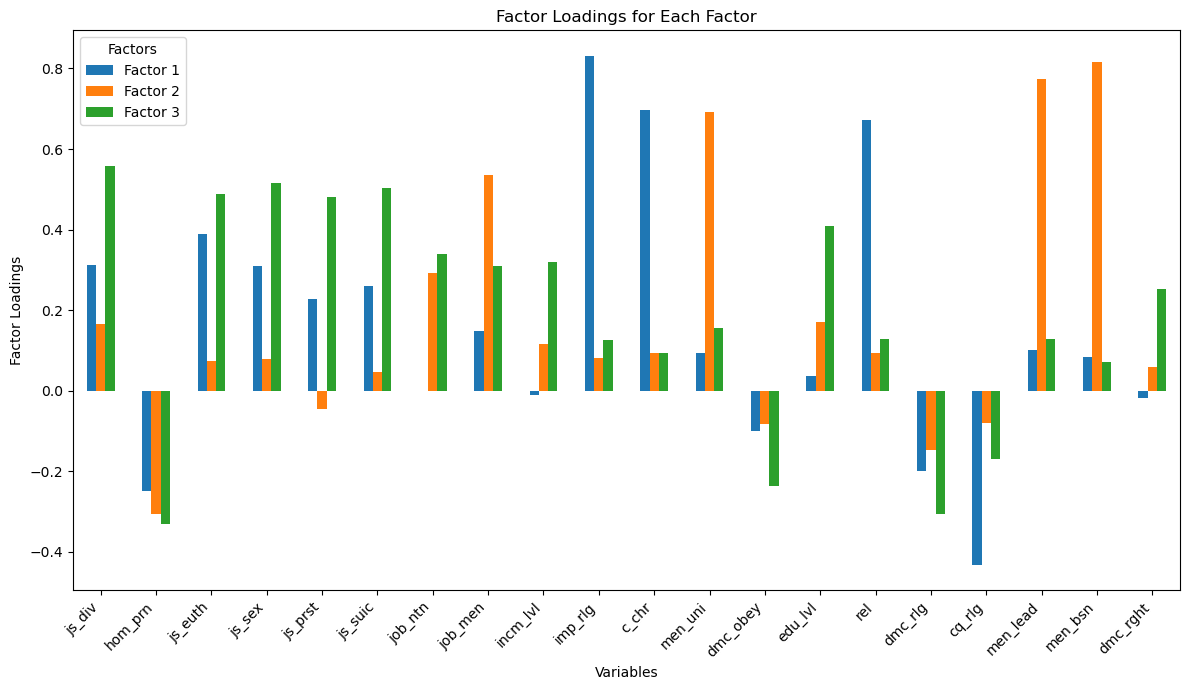

In [18]:
import matplotlib.pyplot as plt

factor_loadings_df.plot(kind='bar', figsize=(12, 7))
plt.xlabel('Variables')
plt.ylabel('Factor Loadings')
plt.title('Factor Loadings for Each Factor')
plt.legend(title='Factors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# PCA TO FIND THE PRINCIPAL COMPONENTS

In [7]:
#create scaled dfEU
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scale dfEU
scaler.fit(dfEU)
scaled_dfEU = pd.DataFrame(scaler.transform(dfEU), columns=dfEU.columns)

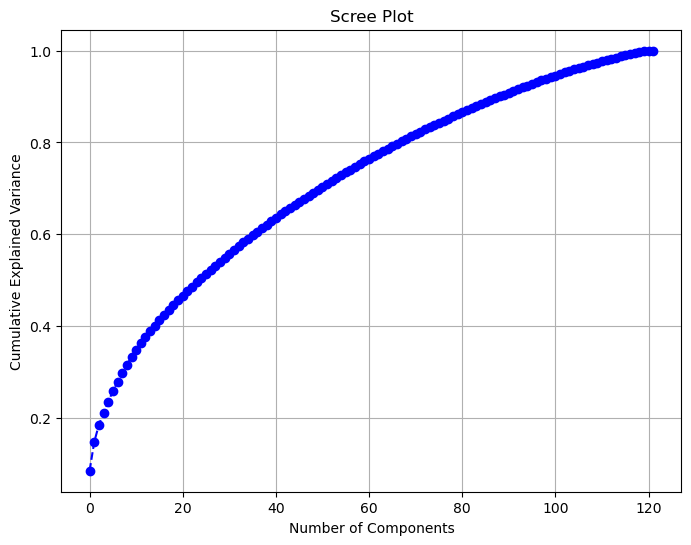

     Principal Component  Explained Variance Ratio
0                      1                  0.084084
1                      2                  0.062791
2                      3                  0.037446
3                      4                  0.025522
4                      5                  0.024587
..                   ...                       ...
117                  118                  0.002218
118                  119                  0.002092
119                  120                  0.001853
120                  121                  0.001398
121                  122                  0.000074

[122 rows x 2 columns]


In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'scaled_dfEU' is your scaled DataFrame

# Perform PCA
pca = PCA()
pca.fit(scaled_dfEU)

# Create a DataFrame for the explained variance
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Optionally, you can print the explained variance for each component
explained_variance_df = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance) + 1),
    'Explained Variance Ratio': explained_variance
})

print(explained_variance_df)

# PC1-2 Loading plot

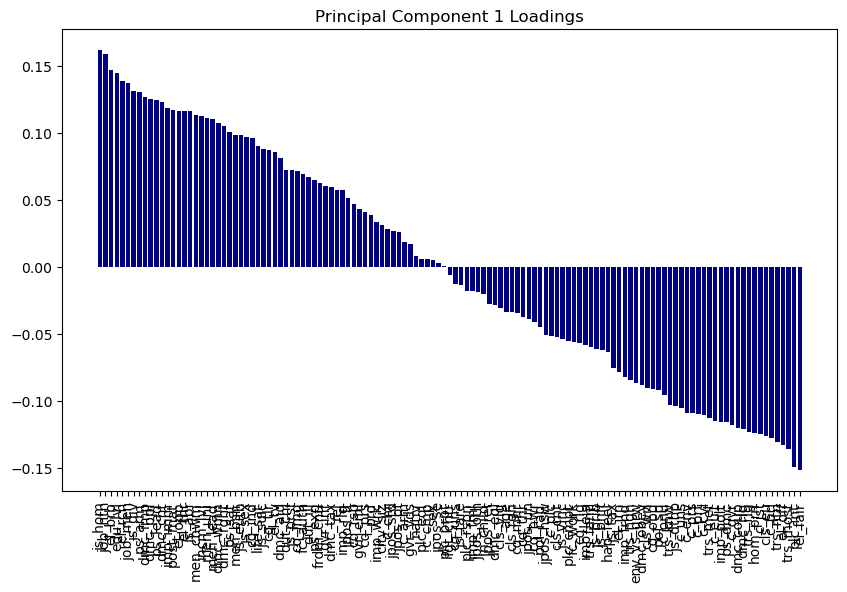

/var/folders/6n/80z78wf52dj6y097kn99nxhr0000gp/T/ipykernel_28766/3693252821.py:36: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/6n/80z78wf52dj6y097kn99nxhr0000gp/T/ipykernel_28766/3693252821.py:41: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



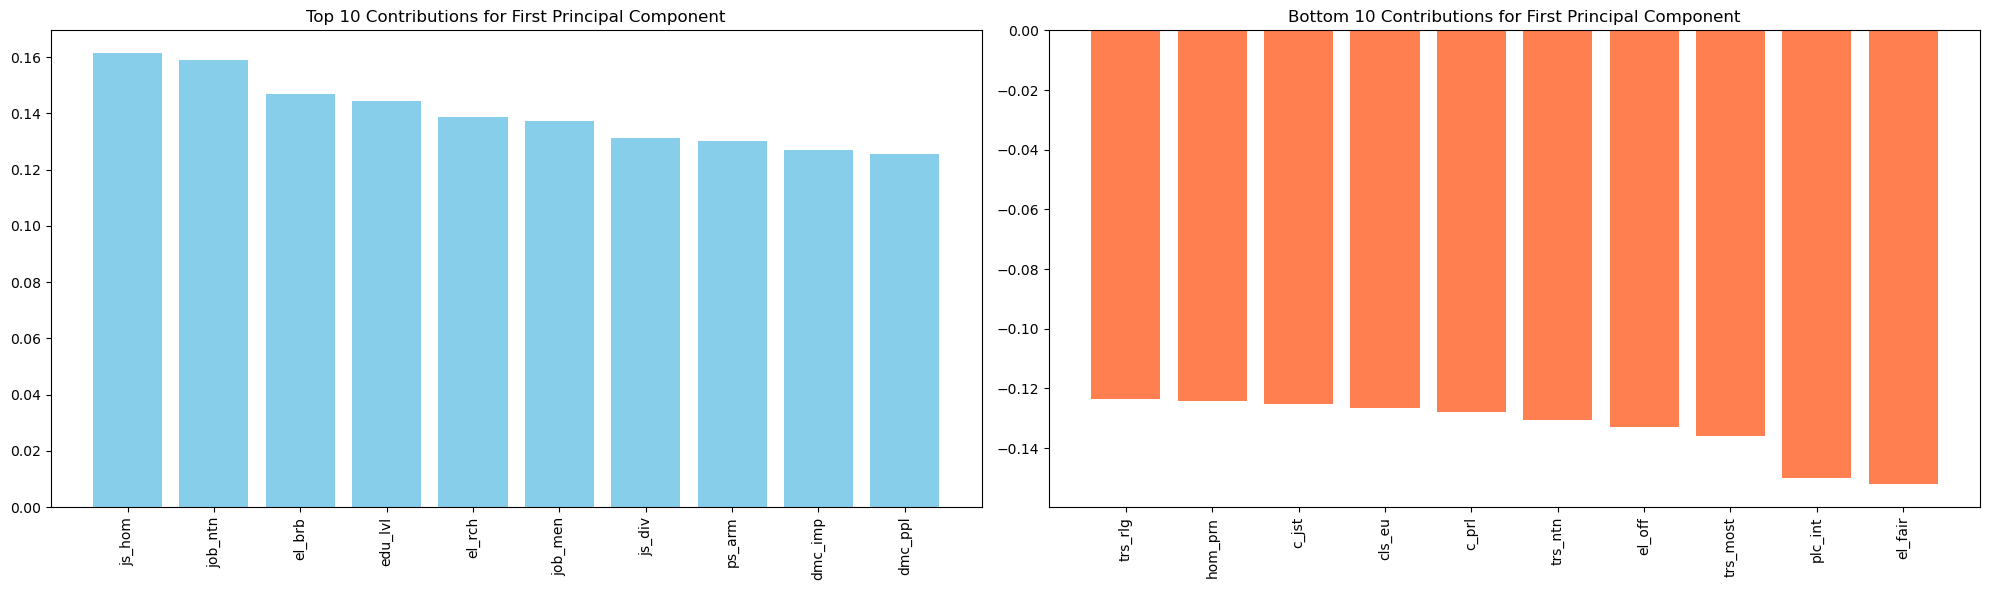

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit(scaled_dfEU)

# Get the loadings of the first principal component
loadings = pca.components_[0]

# Create a dataframe for loadings and their corresponding variable names
loading_df = pd.DataFrame({'Variable': scaled_dfEU.columns, 'Loading': loadings})

# Sort loadings by value
sorted_loading_df = loading_df.sort_values(by='Loading', ascending=False)

# Plot all loadings for the first principal component
plt.figure(figsize=(10,6))
plt.bar(sorted_loading_df['Variable'], sorted_loading_df['Loading'], color='navy')
plt.xticks(rotation=90)
plt.title('Principal Component 1 Loadings')
plt.show()

# Select top 10 highest and bottom 10 lowest loadings
top_10_highest = sorted_loading_df.head(10)
bottom_10_lowest = sorted_loading_df.tail(10)

# Create subplots for the two charts
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot top 10 highest loadings
axes[0].bar(top_10_highest['Variable'], top_10_highest['Loading'], color='skyblue')
axes[0].set_xticklabels(top_10_highest['Variable'], rotation=90)
axes[0].set_title('Top 10 Contributions for First Principal Component')

# Plot bottom 10 lowest loadings
axes[1].bar(bottom_10_lowest['Variable'], bottom_10_lowest['Loading'], color='coral')
axes[1].set_xticklabels(bottom_10_lowest['Variable'], rotation=90)
axes[1].set_title('Bottom 10 Contributions for First Principal Component')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [10]:
# Display the top 10 highest loadings
print("Top 10 Highest Loadings:")
print(top_10_highest)

# Display the bottom 10 lowest loadings
print("Bottom 10 Lowest Loadings:")
print(bottom_10_lowest)

Top 10 Highest Loadings:
    Variable   Loading
88    js_hom  0.161428
78   job_ntn  0.158934
29    el_brb  0.146994
111  edu_lvl  0.144259
32    el_rch  0.138520
77   job_men  0.137300
91    js_div  0.131379
51    ps_arm  0.130021
24   dmc_imp  0.126808
17   dmc_ppl  0.125453
Bottom 10 Lowest Loadings:
    Variable   Loading
69   trs_rlg -0.123674
79   hom_prn -0.124157
46     c_jst -0.125303
98    cls_eu -0.126505
39     c_prl -0.127971
70   trs_ntn -0.130595
31    el_off -0.132849
64  trs_most -0.135790
10   plc_int -0.149942
26   el_fair -0.152132


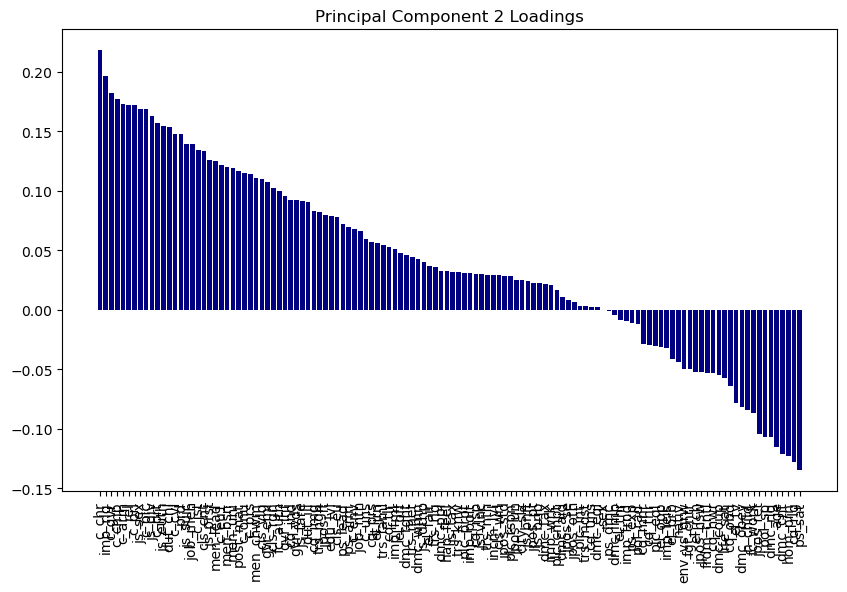

/var/folders/6n/80z78wf52dj6y097kn99nxhr0000gp/T/ipykernel_70497/3692447518.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_10_highest['Variable'], rotation=90)
/var/folders/6n/80z78wf52dj6y097kn99nxhr0000gp/T/ipykernel_70497/3692447518.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(bottom_10_lowest['Variable'], rotation=90)


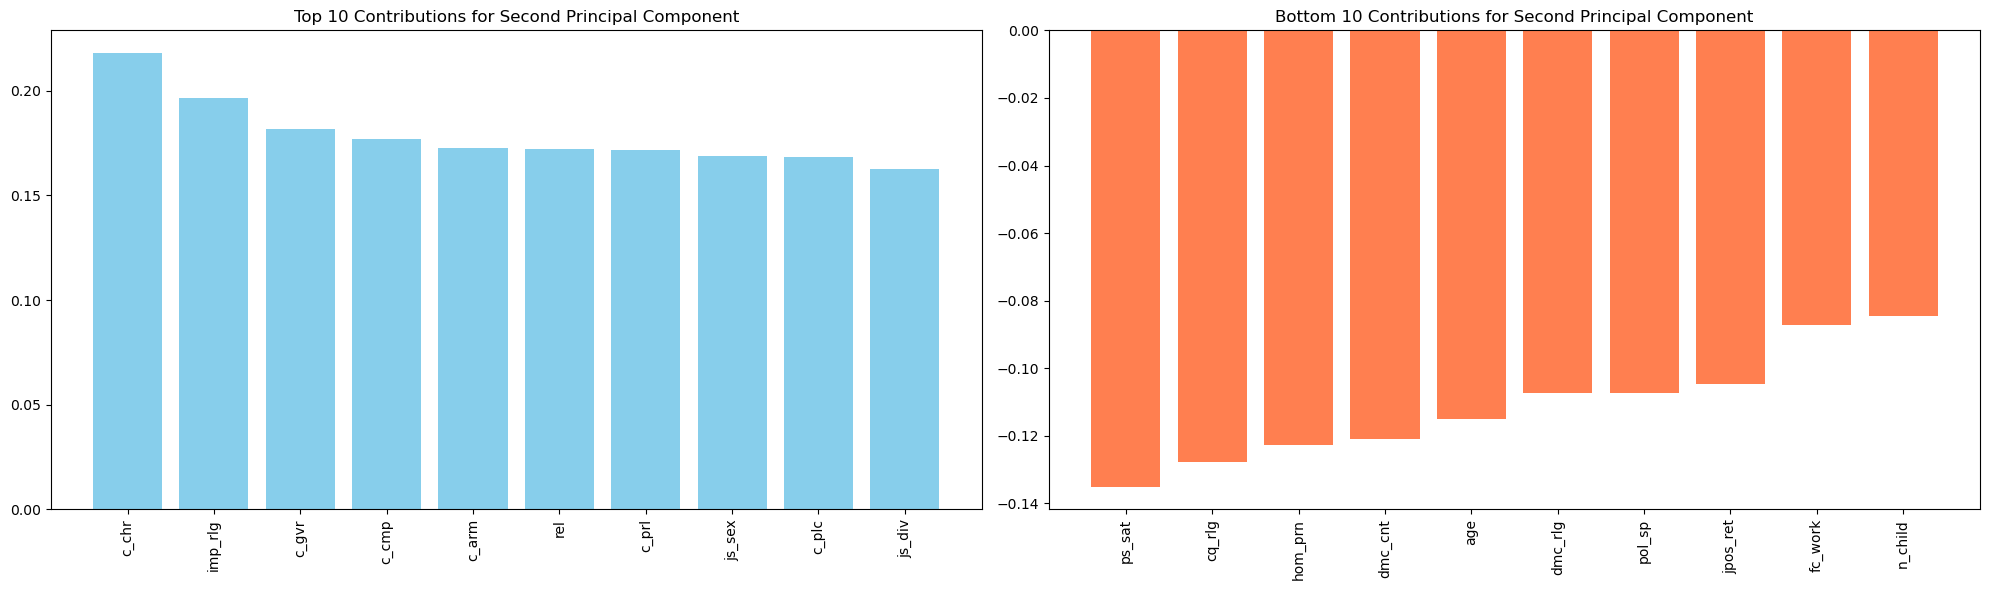

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume loadings and scaled_dfEU are defined
loadings = pca.components_[1]

# Create a dataframe for loadings and their corresponding variable names
loading_df = pd.DataFrame({'Variable': scaled_dfEU.columns, 'Loading': loadings})

# Sort loadings by value
sorted_loading_df = loading_df.sort_values(by='Loading', ascending=False)

# Plot all loadings for the first principal component
plt.figure(figsize=(10,6))
plt.bar(sorted_loading_df['Variable'], sorted_loading_df['Loading'], color='navy')
plt.xticks(rotation=90)
plt.title('Principal Component 2 Loadings')
plt.show()

# Select top 10 highest and bottom 10 lowest loadings
top_10_highest = sorted_loading_df.head(10)
bottom_10_lowest = sorted_loading_df.tail(10)

# Create subplots for the two charts
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot top 10 highest loadings
axes[0].bar(top_10_highest['Variable'], top_10_highest['Loading'], color='skyblue')
axes[0].set_xticklabels(top_10_highest['Variable'], rotation=90)
axes[0].set_title('Top 10 Contributions for Second Principal Component')

# Plot bottom 10 lowest loadings
axes[1].bar(bottom_10_lowest['Variable'], bottom_10_lowest['Loading'], color='coral')
axes[1].set_xticklabels(bottom_10_lowest['Variable'], rotation=90)
axes[1].set_title('Bottom 10 Contributions for Second Principal Component')

# Adjust layout to prevent overlap
plt.tight_layout()

# # Save the figure as a single image file
# plt.savefig('combined_loadings.png')

# Show the plots
plt.show()


In [34]:
# Display the top 10 highest loadings
print("Top 10 Highest Loadings:")
print(top_10_highest)

# Display the bottom 10 lowest loadings
print("Bottom 10 Lowest Loadings:")
print(bottom_10_lowest)

Top 10 Highest Loadings:
    Variable   Loading
34     c_chr  0.217995
5    imp_rlg  0.196758
42     c_gvr  0.181828
44     c_cmp  0.176958
35     c_arm  0.172690
111      rel  0.172320
39     c_prl  0.171905
92    js_sex  0.169069
38     c_plc  0.168555
89    js_div  0.162715
Bottom 10 Lowest Loadings:
     Variable   Loading
48     ps_sat -0.135019
61     cq_rlg -0.127696
79    hom_prn -0.122641
25    dmc_cnt -0.120886
105       age -0.115008
16    dmc_rlg -0.107317
104    pol_sp -0.107190
117  jpos_ret -0.104605
82    fc_work -0.087119
107   n_child -0.084577
